In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,f1_score,precision_score,recall_score,precision_recall_curve,accuracy_score,classification_report,plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_roc_curve,log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
import pickle
with open("Train_test_samples/train_test_split2.pkl","rb") as a:
    train_test_split = pickle.load(a)
with open("saved_pickle/encoders2.pkl","rb") as a:
    encoders = pickle.load(a)
X_train = train_test_split['X_train']
X_test = train_test_split['X_test']
y_train = train_test_split['y_train']
y_test = train_test_split['y_test']


min_scaler = encoders['min_scaler']
std_scaler = encoders['std_scaler']
encoder = encoders['encoder']

In [6]:
numerical_cols = std_scaler.transform(X_train.select_dtypes(exclude='object'))
categorical_cols = encoder.transform(X_train.select_dtypes(include='object'))

X_train_scaled = np.hstack((numerical_cols,categorical_cols))

In [7]:
numerical_cols_ = std_scaler.transform(X_test.select_dtypes(exclude='object'))
categorical_cols_ = encoder.transform(X_test.select_dtypes(include='object'))

X_test_scaled = np.hstack((numerical_cols_,categorical_cols_))

In [17]:
def accuracy_func(x,y,over,model):
        x_ = x[x["current_over"]>=over]
        y_ = y[x["current_over"]>=over]
        
        numerical_cols = std_scaler.transform(x_.select_dtypes(exclude='object'))
        categorical_cols = encoder.transform(x_.select_dtypes(include='object'))

        x_ = np.hstack((numerical_cols,categorical_cols))
        return model.score(x_,y_)
        

In [9]:
def plot_scores(model,name):
    accuracy_list_train = []
    accuracy_list_test = []
    for i in range(20):

        accuracy_list_train.append(accuracy_func(X_train,y_train,i,model))
        accuracy_list_test.append(accuracy_func(X_test,y_test,i,model))

    import matplotlib.pyplot as plt
    plt.plot(range(1,21),accuracy_list_train)
    plt.plot(range(1,21),accuracy_list_test)
    plt.title(name)
    plt.xlabel('Over')
    plt.ylabel('Accuracy_score')
    plt.xticks(range(1,21))
    plt.grid()
    return plt.show()    

## Logistic Regression

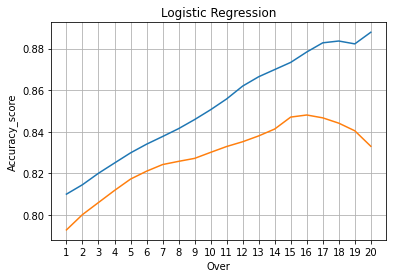

Training Accuracy: 0.8100739636488733
Test Accuracy: 0.7928978966192626
F1Score: 0.8047840744902873


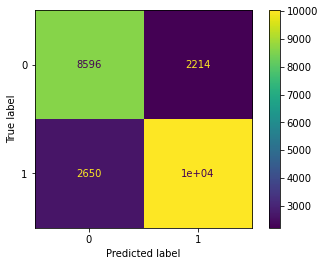

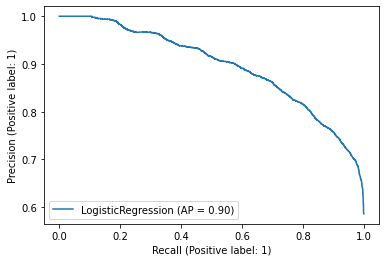

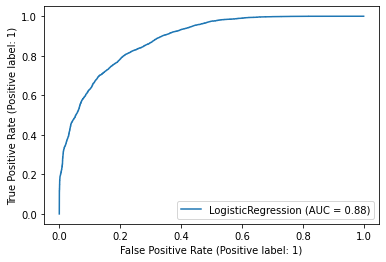

In [51]:
lr = LogisticRegression(penalty='l2',C = 0.04, solver='liblinear', class_weight={0:0.6,1:0.5})
lr.fit(X_train_scaled,y_train)
plot_scores(lr,'Logistic Regression')
print('Training Accuracy:',accuracy_score(y_train,lr.predict(X_train_scaled)))
print('Test Accuracy:', accuracy_score(y_test,lr.predict(X_test_scaled)))
plot_confusion_matrix(lr,X_test_scaled,y_test)
plot_precision_recall_curve(lr,X_test_scaled,y_test)
plot_roc_curve(lr, X_test_scaled,y_test)
print('F1Score:', f1_score(y_test,lr.predict(X_test_scaled)))

## Decision Tree Classifier

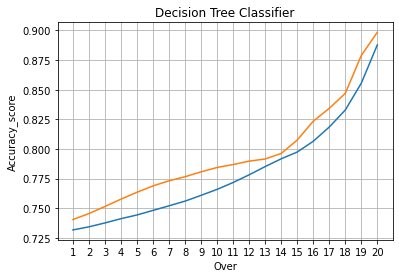

Training Accuracy: 0.7315807579840605
Test Accuracy: 0.7403559567401856
F1Score: 0.7297225423278079


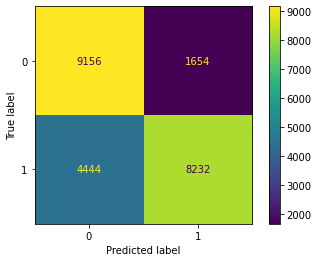

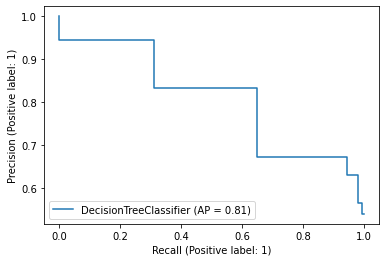

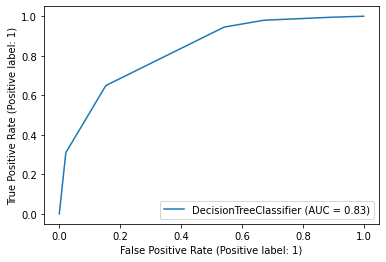

In [70]:
from sklearn.tree import DecisionTreeClassifier

#Hyper Parameter Tuning
param_dist = {  "splitter":['best','random'],
                "criterion":['gini','entropy'],
                "max_features":uniform(0.1,1.0),
                "max_depth":range(1,7),
                "max_leaf_nodes":range(1,7)
            }
clf = RandomizedSearchCV(DecisionTreeClassifier(),
                        param_distributions= param_dist,n_iter=50, cv=5)
clf.fit(X_train_scaled,y_train)
dtc = clf.best_estimator_

dtc.fit(X_train_scaled,y_train)
# dtc = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, max_features=0.3,class_weight={0:0.6,1:0.5}).fit(X_train_scaled,y_train)
plot_scores(dtc,'Decision Tree Classifier')
print('Training Accuracy:',accuracy_score(y_train,dtc.predict(X_train_scaled)))
print('Test Accuracy:', accuracy_score(y_test,dtc.predict(X_test_scaled)))
plot_confusion_matrix(dtc,X_test_scaled,y_test)
plot_precision_recall_curve(dtc,X_test_scaled,y_test)
plot_roc_curve(dtc, X_test_scaled,y_test)
print('F1Score:', f1_score(y_test,dtc.predict(X_test_scaled)))

## Random Forest Classifier

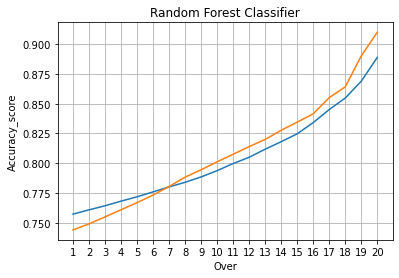

Training Accuracy: 0.7572100223611031
Test Accuracy: 0.743975134122456
F1Score: 0.7687396638590823


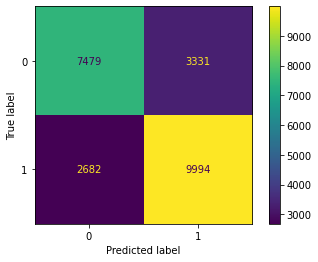

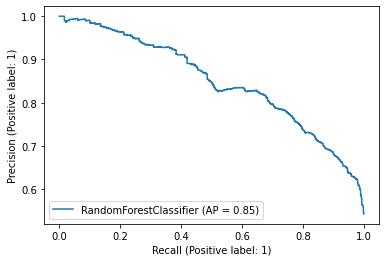

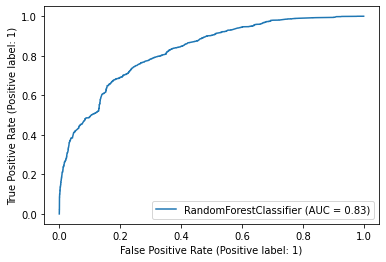

In [53]:
rfc = RandomForestClassifier(n_estimators= 100,
                             max_depth=2, 
                             max_leaf_nodes=3, 
                             max_features=0.3).fit(X_train_scaled,y_train)
plot_scores(rfc,'Random Forest Classifier')
print('Training Accuracy:',accuracy_score(y_train,rfc.predict(X_train_scaled)))
print('Test Accuracy:', accuracy_score(y_test,rfc.predict(X_test_scaled)))
plot_confusion_matrix(rfc,X_test_scaled,y_test)
plot_precision_recall_curve(rfc,X_test_scaled,y_test)
plot_roc_curve(rfc, X_test_scaled,y_test)
print('F1Score:', f1_score(y_test,rfc.predict(X_test_scaled)))

## Gradient Boosting Classifier

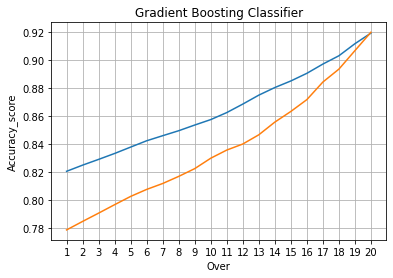

Training Accuracy: 0.8206381514821398
Test Accuracy: 0.7788469726645662
F1Score: 0.7962178279974891


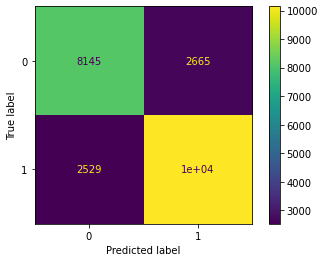

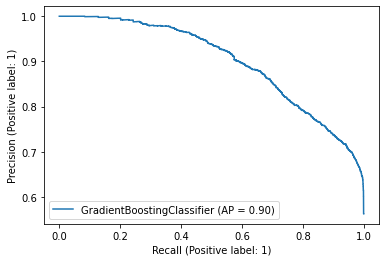

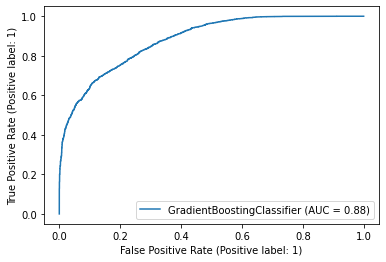

In [91]:
gbdt = GradientBoostingClassifier(max_depth=2,
                           max_features=0.4, min_samples_leaf=2,
                           n_estimators=110)


gbdt.fit(X_train_scaled,y_train)

plot_scores(gbdt,'Gradient Boosting Classifier')
print('Training Accuracy:',accuracy_score(y_train,gbdt.predict(X_train_scaled)))
print('Test Accuracy:', accuracy_score(y_test,gbdt.predict(X_test_scaled)))
plot_confusion_matrix(gbdt,X_test_scaled,y_test)
plot_precision_recall_curve(gbdt,X_test_scaled,y_test)
plot_roc_curve(gbdt, X_test_scaled,y_test)
print('F1Score:', f1_score(y_test,gbdt.predict(X_test_scaled)))

In [94]:
models_data = pd.DataFrame(columns=["Model Name","Train Accuracy","Test Accuracy","Log Loss","Precision","Recall","F1 Score"])
models_data

,Model Name,Train Accuracy,Test Accuracy,Log Loss,Precision,Recall,F1 Score


In [95]:
def update_models_data(model,model_name):
    global models_data
   
    model.fit(X_train_scaled,y_train)
    out = model.predict(X_test_scaled)
    out_proba = model.predict_proba(X_test_scaled)
    trn_acc = accuracy_score(y_train,model.predict(X_train_scaled))
    tst_acc = accuracy_score(y_test,out)
    l_loss = log_loss(y_test,out_proba)
    prec = precision_score(y_test,out)
    rec = recall_score(y_test,out)
    f1 = f1_score(y_test,out)
    
    models_data = models_data.append({"Model Name": model_name,
                        "Train Accuracy":trn_acc,
                        "Test Accuracy":tst_acc,
                        "Log Loss":l_loss,
                        "Precision":prec,
                        "Recall":rec,
                        "F1 Score":f1,
                        },
                       ignore_index = True)

In [96]:
update_models_data(lr,'Logistic Regression')
update_models_data(dtc,'Decision Tree')
update_models_data(rfc,'Random Forest')
update_models_data(gbdt,'Gradient Boosting')

In [97]:
models_data

,Model Name,Train Accuracy,Test Accuracy,Log Loss,Precision,Recall,F1 Score
0,Logistic Regression,0.810074,0.792898,0.423406,0.819118,0.790944,0.804784
1,Decision Tree,0.724442,0.696841,0.507729,0.746451,0.663774,0.702689
2,Random Forest,0.754702,0.748063,0.563155,0.768321,0.763411,0.765858
3,Gradient Boosting,0.821943,0.779486,0.427615,0.790514,0.80467,0.797529


## Saving Model

In [ ]:
import pickle
with open("saved_pickle/model_inn2.pkl", 'wb') as f:
    pickle.dump(lr,f)

In [ ]:
with open("saved_pickle/model_inning2.pkl", 'wb') as f:
    pickle.dump(gbdt,f)

In [ ]:
with open("saved_pickle/model_inning2.pkl", 'rb') as f:
    gbdt= pickle.load(f)

# *Hyperparameter Tuning for LogisticRegression*

In [33]:
param_dist = {
             "C":uniform(0.1,1),
             "class_weight":{0:uniform(0,1), 1:uniform(0,1)}
             }
clf = RandomizedSearchCV(LogisticRegression(),
                        param_distributions= param_dist, n_iter=10, cv=5)
clf.fit(X_train,y_train)
lr = clf.best_estimator_
lr

# *Hyperparameter Tuning for RandomForest*

In [13]:
param_dist = {"n_estimators": list(range(10,100,10)),
               "max_features":range(5,20,2),
               "max_samples":uniform(0.1,0.8),
              "max_depth":range(3,15),
              "min_samples_leaf": range(1,4)
             }
clf = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions= param_dist, n_iter=20, cv=5)
clf.fit(X_train_scaled,y_train)
lr = clf.best_estimator_
lr

RandomForestClassifier(max_depth=10, max_features=19,
                       max_samples=0.5668338542998387, min_samples_leaf=3,
                       n_estimators=50)

In [123]:
param_dist = {
              "n_estimators": list(range(20,70,10)),
              "max_features":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
              "max_depth":range(1,5),
              "min_samples_leaf": range(1,5),
             }
clf = RandomizedSearchCV(GradientBoostingClassifier(),
                        param_distributions= param_dist, n_iter=30, cv=3)
clf.fit(X_train_scaled,y_train)
lr = clf.best_estimator_
lr

GradientBoostingClassifier(max_features=0.1, min_samples_leaf=3,
                           n_estimators=50)

In [51]:
lr = clf.fit(X_train,y_train)

In [52]:
lr = clf.best_estimator_

In [171]:
lr = GradientBoostingClassifier(learning_rate=0.07, max_depth=5,
                           max_features=13, min_samples_leaf=3,
                           n_estimators=30)

In [172]:
lr.fit(X_train_scaled,y_train)

GradientBoostingClassifier(learning_rate=0.07, max_depth=5, max_features=13,
                           min_samples_leaf=3, n_estimators=30)